# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:
max_price_index = ds['price'].idxmax()

max_price_house = ds.loc[max_price_index]
print("The house with address ", max_price_house["address"], " is the most expensive and its price is ", max_price_house["price"])

The house with address  El Escorial  is the most expensive and its price is  8500000


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [3]:
cheapest_house_index = ds["price"].idxmin()

cheapest_house_price = ds.loc[cheapest_house_index]

print("The house with address ", cheapest_house_price["address"], " is the cheapest and its price is ", cheapest_house_price["price"])

The house with address  Parla  is the cheapest and its price is  0


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [4]:
# biggest house
biggest_house_index = ds['surface'].idxmax()
biggest_house = ds.loc[biggest_house_index]
print("The biggest house is located on ", biggest_house['address'], " and its surface is ", biggest_house['surface'])

# smallest house
smallest_house_index = ds['surface'].idxmin()
smallest_house = ds.loc[smallest_house_index]
print("The smallest house is located on ", smallest_house['address'], " and its surface is ", smallest_house['surface'])

The biggest house is located on  Sevilla la Nueva  and its surface is  249000.0
The smallest house is located on  Calle Amparo,  Madrid Capital  and its surface is  15.0


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
grouped = ds['level5'].unique().tolist()

print(grouped)

['Arganda del Rey', 'Fuenlabrada', 'Boadilla del Monte', 'Las Rozas de Madrid', ' Madrid Capital', 'Villaviciosa de Odón', 'Pinto', 'Valdemoro', 'Navalcarnero', 'Pozuelo de Alarcón', 'Torrejón de Ardoz', 'Navalagamella', 'San Sebastián de los Reyes', 'Rivas-vaciamadrid', 'Alpedrete', 'Móstoles', 'San Fernando de Henares', 'Coslada', 'Becerril de la Sierra', 'Alcalá de Henares', 'Chinchón', 'Parla', 'Alcorcón', 'El Escorial', 'Leganés', 'Pedrezuela', 'Majadahonda', 'Villanueva de la Cañada', 'Villanueva del Pardillo', 'Torrelodones', 'Moralzarzal', 'Mejorada del Campo', 'Aranjuez', 'Corpa', 'Getafe', 'Velilla de San Antonio', 'Sevilla la Nueva', 'San Martín de la Vega', 'Villalbilla', 'Collado Villalba', 'Alcobendas', 'El Molar (Madrid)', 'Moraleja de Enmedio', 'Algete', 'Campo Real', 'Torrejón de la Calzada', 'Colmenar Viejo', 'Valdemorillo', 'Fuente El Saz de Jarama', 'Tres Cantos', 'Arroyomolinos (Madrid)', 'Griñón', 'Paracuellos de Jarama', 'Guadarrama', 'Titulcia', 'Galapagar', 'Co

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [6]:
contains_na = ds.isnull().values.any()
print(contains_na)

na_rows_index = ds.index[ds.isnull().any(axis=1)].tolist()

# Print the rows with NAs
print("The rows containing NAs are: ", na_rows_index)

# Getting and printing the columns with NAs
na_columns = ds.columns[ds.isnull().any()].tolist()
print("The columns with NAs are: ", na_columns)

True
The rows containing NAs are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [7]:
ds_clean = ds.dropna(axis=1, how='all')

print("The dimensions of the original dataset are ", ds.shape, 
      ".\nThe dimensions of the cleaned dataset are ", ds_clean.shape)

The dimensions of the original dataset are  (15335, 37) .
The dimensions of the cleaned dataset are  (15335, 35)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [8]:
# Grouping the Madrid population (level5)
madrid_pop = ds[ds['level5'] == "Arroyomolinos (Madrid)"]

# Take the mean price of that population
madrid_avg_price = madrid_pop['price'].mean()

# Printing the mean price of the Madrid population
print("The mean of prices in the population of Arroyomolinos (Madrid) is ", madrid_avg_price)

The mean of prices in the population of Arroyomolinos (Madrid) is  294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

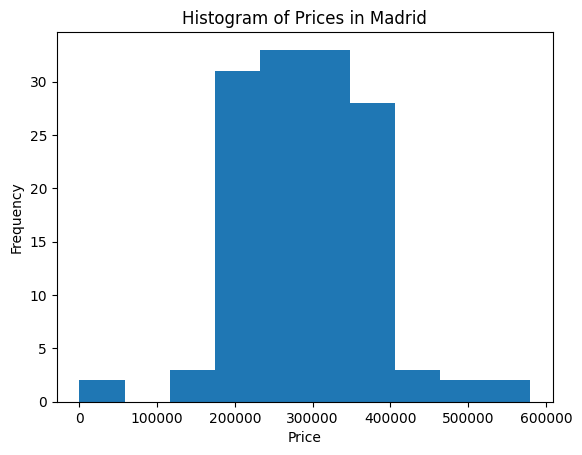

In [9]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(madrid_pop['price'])

# Adding labels and title
plt.xlabel("Price")
plt.ylabel('Frequency')
plt.title("Histogram of Prices in Madrid")

# Show plot
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [10]:
# Average price of Valdemorillo:
valde = ds[ds['level5'] == "Valdemorillo"]
valde_price = valde['price'].mean()
print(valde_price)

# Average price of Galapagar
gal = ds[ds['level5'] == "Galapagar"]
gal_price = gal['price'].mean()
print(gal_price)

# Print the differences between the two populations' average prices
print("The average price of Valdemorillo is ", valde_price,
       "\nThe average price of Galapagar is ", gal_price,
        "\nThey are not the same, and have a difference of ", valde_price-gal_price)

363860.2931034483
360063.20238095237
The average price of Valdemorillo is  363860.2931034483 
The average price of Galapagar is  360063.20238095237 
They are not the same, and have a difference of  3797.090722495923


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [11]:
# Creating column for price per square meter
ds['pps'] = ds['price'] / ds['surface']
valde = ds[ds['level5'] == "Valdemorillo"]
gal = ds[ds['level5'] == "Galapagar"]

# Average pps of Valdemorillo:
valde_pps = valde['pps'].mean()

# Average pps of Galapagar
gal_pps = gal['pps'].mean()

# Printing both values and compare
print("The average price per square meter of Valdemorillo is", valde_pps,
      "\nThe average price per square meter of Galapagar is ", gal_pps,
      "\nThere is a difference of ", gal_pps-valde_pps)# TODO

The average price per square meter of Valdemorillo is 1317.9502109024986 
The average price per square meter of Galapagar is  1606.3240303094024 
There is a difference of  288.37381940690375


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

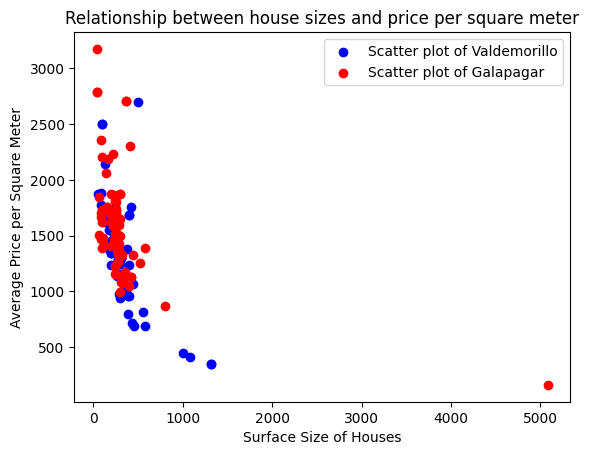

In [12]:
# Plotting scatter plot of Valdemorillo
plt.scatter(valde['surface'], valde['pps'],
            color = 'blue',
            label='Scatter plot of Valdemorillo' )

# Adding scatter plot for Galapagar
plt.scatter(gal['surface'], gal['pps'],
            color = 'red',
            label = 'Scatter plot of Galapagar')

# Adding labels, legend, and a title
plt.xlabel('Surface Size of Houses')
plt.ylabel('Average Price per Square Meter')
plt.title('Relationship between house sizes and price per square meter')
plt.legend()

plt.show()

**Conclusion**. There seems to be a downward trend in the relationship between house size and price. This implies that as house size increases, the price per square meter decreases. While the trend for both Galapagar and Valdemorillo are downward trending, the best fit line for Galapagar seems to be curving while the best fit line for Valdemorillo may be closer to linear. This implies that as house sizes increase, Galapagar's average price per square emter decreases even more rapidly for larger size houses.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [13]:
# Making list of unique real estate agency phone numbers
diff_agencies = ds['phone_realEstate'].unique().tolist()

# Printing length of list of different agencies
print(len(diff_agencies))

1808


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [14]:
# Grouping dataset by population
pop_grouped = ds['level5'].value_counts()

# Finding population with highest number of houses
most_houses_pop = pop_grouped.idxmax()

# Finding the number of houses in that population
max_house_count = pop_grouped.max()

# Printing results
print("The population with the most houses is ", most_houses_pop,
      " with ", max_house_count, " houses.")

The population with the most houses is   Madrid Capital  with  6643  houses.


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [15]:
# Make a list of the populations that we want
sub_pop_list = ('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón')

# Make a new dataset and see if list is in dataframe
south_belt = ds[ds['level5'].isin(sub_pop_list)]
print(south_belt)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

Text(0.5, 1.0, 'Median House Price by Population')

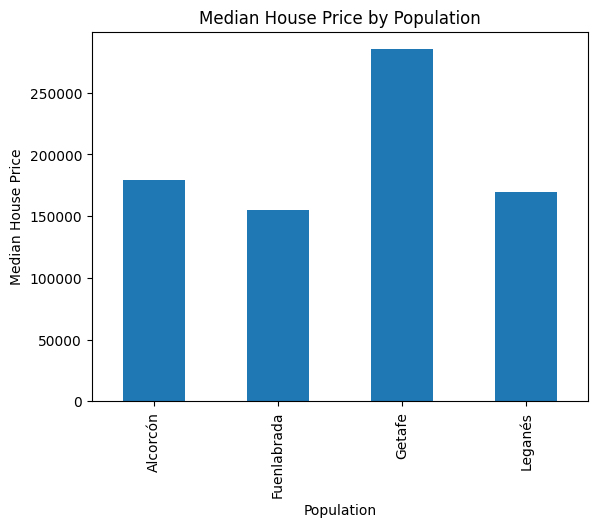

In [16]:
# Getting median of each of the 4 populations
south_belt_medians = south_belt.groupby('level5')['price'].median()

# Making bar plot
south_belt_medians.plot(kind = 'bar')

# Adding labels and title
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.title('Median House Price by Population')

**Observation**. All populations in the south belt of Madrid seems to have roughly similar median house prices ranging from 
180,000, except for Getafe, which has a significantly higher median price (about $280,000) compared to the other three populations in the area.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [18]:
import numpy as np

# Calculating mean and variance of South Belt prices
sb_price_mean = np.mean(south_belt['price'])
sb_price_var = np.var(south_belt['price'])
print("The sample mean of the price is ", sb_price_mean,
      "\nThe variance of the price is ", sb_price_var)

# Calculating mean and variance of South Belt rooms
sb_rooms_mean = np.mean(south_belt['rooms'])
sb_rooms_var = np.var(south_belt['rooms'])
print("The sample mean of the number of rooms is ", sb_rooms_mean,
      "\nThe variance of the number of rooms is ", sb_rooms_var)

# Calculating mean and variance of South Belt house surface area
sb_surface_mean = np.mean(south_belt['surface'])
sb_surface_var = np.var(south_belt['surface'])
print("The sample mean of surface area is ", sb_surface_mean,
      "\nThe variance of the surface area is ", sb_surface_var)

# Calculating mean and variance of South Belt bathrooms
sb_bathrooms_mean = np.mean(south_belt['bathrooms'])
sb_bathrooms_var = np.var(south_belt['bathrooms'])
print("The sample mean of bathrooms is ", sb_bathrooms_mean,
            "\nThe variance of the bathrooms is ", sb_bathrooms_var)

The sample mean of the price is  223094.48070562293 
The variance of the price is  14904916165.70277
The sample mean of the number of rooms is  3.0177383592017737 
The variance of the number of rooms is  0.7180888982846692
The sample mean of surface area is  111.75222363405337 
The variance of the surface area is  4257.634921993191
The sample mean of bathrooms is  1.633221850613155 
The variance of the bathrooms is  0.5711594078614581


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [19]:
for i in sub_pop_list:

    highest_price_index = south_belt[south_belt['level5'] == i]['price'].idxmax()
    most_expensive_sb = south_belt.loc[highest_price_index]
                                       
    print("In the population of", i, ", the most expensive house has a price of ",
          most_expensive_sb['price'], " and is located at ", 
          most_expensive_sb['address'])

In the population of Fuenlabrada , the most expensive house has a price of  490000  and is located at  Calle de Paulo Freire, 5, Fuenlabrada
In the population of Leganés , the most expensive house has a price of  650000  and is located at  Avenida Reina Sofía, Leganés
In the population of Getafe , the most expensive house has a price of  1050000  and is located at  Getafe
In the population of Alcorcón , the most expensive house has a price of  950000  and is located at  Alcorcón


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

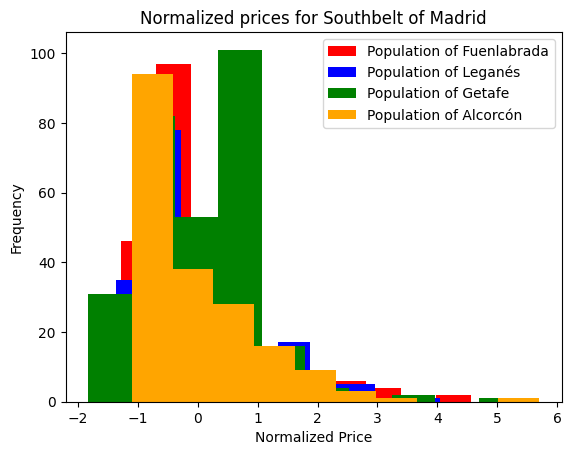

In [20]:
# Normalizing prices for each population of the subset
ds.loc[:, 'normalized_price'] = ds.groupby('level5')['price'].transform(lambda x: (x - x.mean()) / x.std())
south_belt = ds[ds['level5'].isin(sub_pop_list)]

# Making list of colors
colors = ('red', 'blue', 'green', 'orange')

# Plotting scatter plot for the 4 different populations
for this_color, population in zip(colors, sub_pop_list):
    this_pop = south_belt[south_belt['level5'] == population]
    plt.hist(this_pop['normalized_price'], 
             color=this_color, 
             label =(f'Population of {population}'))
    
plt.title("Normalized prices for Southbelt of Madrid")
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.legend()

**Observation:** It seems that the normalized prices for the population of Getafe are higher than those of the other populations for the Southbelt of Madrid. All populations seem to have some outliers with very high normalized prices.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In Getafe, the mean price per square meter is  2066.314949251463 
The median is  1973.3333333333333 
and the variance is  548091.3920632529

In Alcorcón, the mean price per square meter is  2239.302480199618 
The median is  2207.7922077922076 
and the variance is  289862.4045465634

Getafe has both a high median and mean price per square meter, with a difference of roughly 200 for both


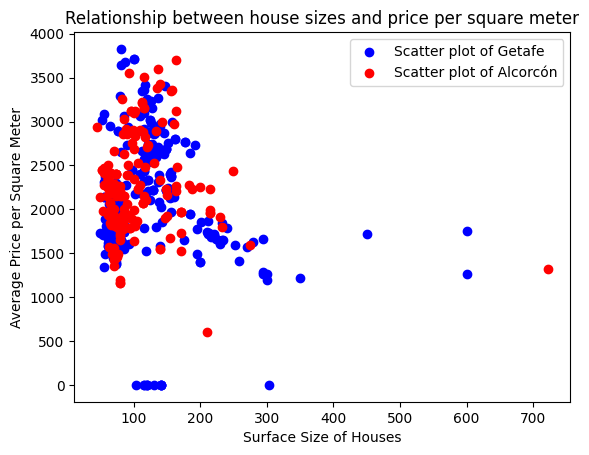

In [21]:
# Calculating the mean, median, and variance of Getafe pps
# and printing the results
get_pps_mean = south_belt[south_belt['level5'] == "Getafe"]['pps'].mean()
get_pps_med = south_belt[south_belt['level5'] == "Getafe"]['pps'].median()
get_pps_var = np.var(south_belt[south_belt['level5'] == "Getafe"]['pps'])
print("In Getafe, the mean price per square meter is ", get_pps_mean,
      "\nThe median is ", get_pps_med,
      "\nand the variance is ", get_pps_var)

# Calculating the mean, median, and variance of Alcorcón pps 
# and printing the results
alco_pps_mean = south_belt[south_belt['level5'] == "Alcorcón"]['pps'].mean()
alco_pps_med = south_belt[south_belt['level5'] == "Alcorcón"]['pps'].median()
alco_pps_var = np.var(south_belt[south_belt['level5'] == "Alcorcón"]['pps'])
print("\nIn Alcorcón, the mean price per square meter is ", alco_pps_mean,
      "\nThe median is ", alco_pps_med,
      "\nand the variance is ", alco_pps_var)

# Analyzing the results:
print("\nGetafe has both a high median and mean price per square meter, with a difference of roughly 200 for both")

getafe = south_belt[south_belt['level5'] == "Getafe"]
alco = south_belt[south_belt['level5'] == "Alcorcón"]

# Plotting scatter plot of Getafe
plt.scatter(getafe['surface'], getafe['pps'],
            color = 'blue',
            label='Scatter plot of Getafe' )

# Adding scatter plot for Alcorcón
plt.scatter(alco['surface'], alco['pps'],
            color = 'red',
            label = 'Scatter plot of Alcorcón')

# Adding labels, legend, and a title
plt.xlabel('Surface Size of Houses')
plt.ylabel('Average Price per Square Meter')
plt.title('Relationship between house sizes and price per square meter')
plt.legend()

plt.show()

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

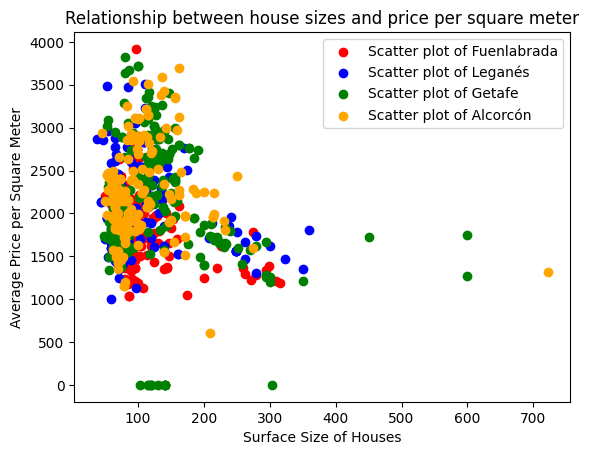

In [22]:
# Making list of colors
colors = ('red', 'blue', 'green', 'orange')

# Plotting scatter plot for the 4 different populations
for this_color, population in zip(colors, sub_pop_list):
    this_pop = south_belt[south_belt['level5'] == population]
    plt.scatter(this_pop['surface'], this_pop['pps'],
                color = this_color,
                label=(f'Scatter plot of {population}'))
    
# Adding labels, legend, and a title
plt.xlabel('Surface Size of Houses')
plt.ylabel('Average Price per Square Meter')
plt.title('Relationship between house sizes and price per square meter')
plt.legend()

plt.show()

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [27]:
from ipyleaflet import Map, Marker, AwesomeIcon, basemaps#, basemap_to_tiles
from ipywidgets import Layout

# Set the map to load centered on the south west part of Madrid
center=[40.35, -3.8]
zoom=11.5

# Create the map
map=Map(
    basemap=basemaps.OpenStreetMap.Mapnik,
    center=center,
    zoom=zoom,
    layout=Layout(height='600px')
)

# Add map markers for each property in the dataset
for population, color in zip(south_belt, colors):

    icon=AwesomeIcon(
        name='home',
        marker_color=color,
        icon_color='white',
        spin=False
    )

    population_df=south_belt[south_belt['level5'] == population]

    for i, row in population_df.iterrows():

        lat=float(row['latitude'].replace(',', '.'))
        lon=float(row['longitude'].replace(',', '.'))

        map.add(Marker(icon=icon, location=(lat, lon)))

# Show the map
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…